In [ ]:
import mysql.connector as sql
import pandas as pd
import matplotlib.pyplot as plt 
conn = sql.connect(
    host = 'localhost',
    user = 'root',
    use_pure = True,
    database = 'emissions_db'
)
conn

ModuleNotFoundError: No module named 'mysql'

In [ ]:
cursor = conn.cursor()

NameError: name 'conn' is not defined

In [ ]:
#cursor.execute("CREATE DATABASE emissions_db") if not already made 
cursor.execute("USE emissions_db")

In [ ]:
cursor.execute("SHOW DATABASES") 
for db in cursor :
    print(db[0])

emissions_db
information_schema
mysql
performance_schema
sys


In [ ]:
from sqlalchemy import create_engine

df = pd.read_csv("/Users/eugene/Desktop/DataMiningProj/CAP4770-Group1/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022.csv") #<- replace with own file paths

engine = create_engine("mysql+mysqlconnector://root@localhost/emissions_db")

df.to_sql(name='emissions', con=engine, if_exists='replace', index=False)


1016

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Reload the data from the same CSV or directly from the DataFrame if it's still in memory
# df = pd.read_csv("SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022.csv") # Not needed if already loaded

# Select relevant numeric features for clustering
clustering_data = df[['Supply Chain Emission Factors without Margins', 
                      'Margins of Supply Chain Emission Factors', 
                      'Supply Chain Emission Factors with Margins']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Get top 10 emitters by emissions
top_emitters = df.sort_values(by='Supply Chain Emission Factors without Margins', ascending=False).head(10)

# Plot top 10 emitters, color-coded by cluster
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_emitters,
    x='Supply Chain Emission Factors without Margins',
    y='2017 NAICS Title',
    hue='Cluster',
    dodge=False,
    palette='Set2'
)
plt.title('Top 10 Emitting Sectors by Supply Chain Emissions (Clustered)')
plt.xlabel('Supply Chain Emission Factors without Margins')
plt.ylabel('2017 NAICS Title')
plt.tight_layout()
plt.show()


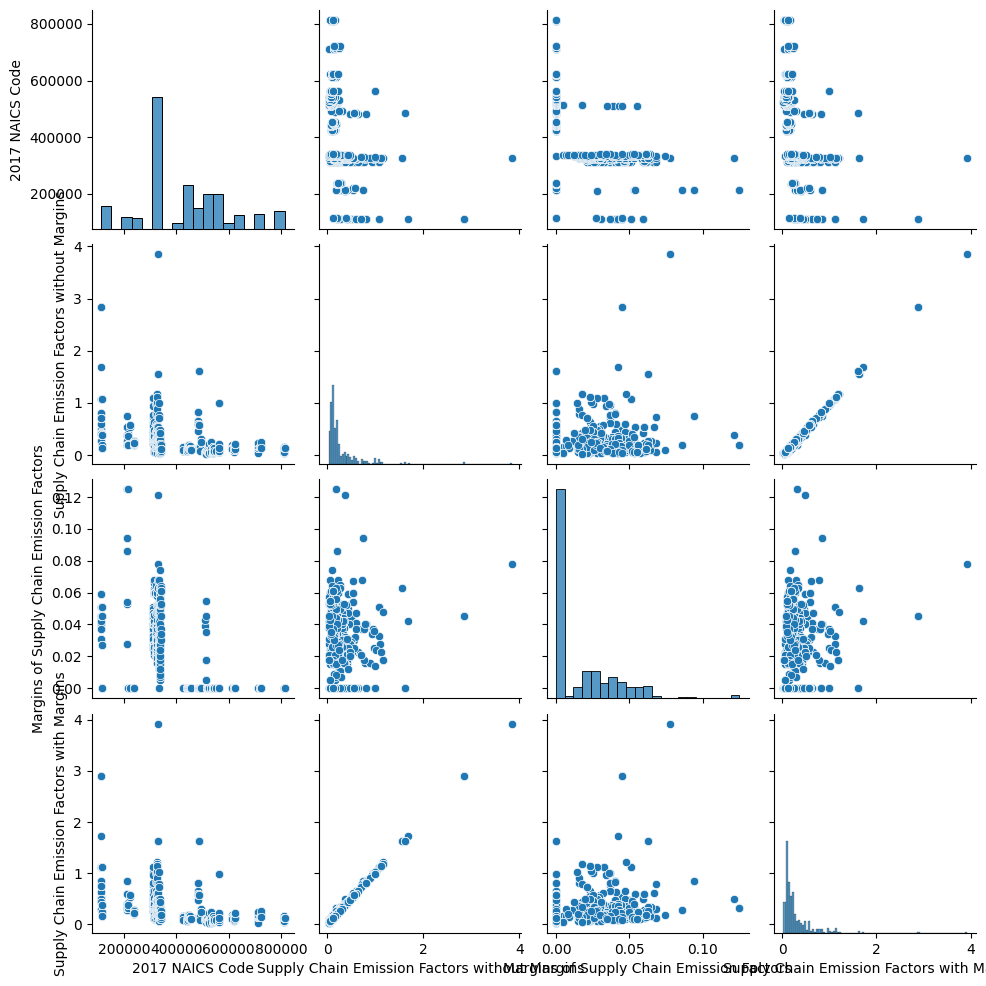

In [ ]:
import seaborn as sns

sns.pairplot(df)

In [ ]:
corr = df.corr(numeric_only= True)
corr

,2017 NAICS Code,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
2017 NAICS Code,1.000000,-0.353885,-0.604882,-0.390426
Supply Chain Emission Factors without Margins,-0.353885,1.000000,0.249769,0.997525
Margins of Supply Chain Emission Factors,-0.604882,0.249769,1.000000,0.317226
Supply Chain Emission Factors with Margins,-0.390426,0.997525,0.317226,1.000000


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Emission Factors")
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()


NameError: name 'plt' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017 NAICS Code                                1016 non-null   int64  
 1   2017 NAICS Title                               1016 non-null   object 
 2   GHG                                            1016 non-null   object 
 3   Unit                                           1016 non-null   object 
 4   Supply Chain Emission Factors without Margins  1016 non-null   float64
 5   Margins of Supply Chain Emission Factors       1016 non-null   float64
 6   Supply Chain Emission Factors with Margins     1016 non-null   float64
 7   Reference USEEIO Code                          1016 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 63.6+ KB


In [ ]:
for col in df.columns:
    print(f"\t%s: %d" % (col, df[col].isna().sum()))

	2017 NAICS Code: 0
	2017 NAICS Title: 0
	GHG: 0
	Unit: 0
	Supply Chain Emission Factors without Margins: 0
	Margins of Supply Chain Emission Factors: 0
	Supply Chain Emission Factors with Margins: 0
	Reference USEEIO Code: 0


In [ ]:
df.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0


In [ ]:
X = df[['2017 NAICS Code', 'GHG', 'Reference USEEIO Code']]
y = df['Supply Chain Emission Factors without Margins'] # using without margins bc with margins includes noise

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

categorical_features = ['GHG', 'Reference USEEIO Code']
numeric_features = ['2017 NAICS Code']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep numeric features as-is
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.913483430220982


In [ ]:
cursor.close()
conn.close()